# Clasificación binaria con scikit-learn

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import pandas as pd

## Análisis del dataset Iris

```scikit-learn``` incorpora unos [datasets de ejemplo](https://scikit-learn.org/stable/datasets/toy_dataset.html) que podemos utilizar para probar nuestros modelos. En este caso vamos a utilizar el dataset de flores [Iris](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py). Este dataset contiene 150 muestras de 3 especies diferentes de flores del [género Iris](https://es.wikipedia.org/wiki/Iris_(planta)) (50 muestras por especie) clasificadas. Para cada muestra se han tomado las medidas de longitud y anchura del sépalo y del pétalo. Tenemos por tanto 4 **características o *features*** (longitud y anchura del sépalo y del pétalo) y la clase (especie de la flor).


In [4]:
from sklearn.datasets import load_wine
wine = load_wine()


Estos datasets son objetos de tipo ```Bunch``` que contienen los datos y la información de las variables.
Podemos ver la descripción del dataset con el atributo ```DESCR``` y los nombres de las *features* con el atributo ```feature_names```.

In [5]:
print(type(wine)) # Tipo de objeto

<class 'sklearn.utils._bunch.Bunch'>


El atributo ```iris.target``` contiene las **etiquetas de las muestras**. En este caso son números enteros que representan las clases de las flores (0, 1 o 2). Para saber qué clase representa cada número podemos consultar el atributo ```target_names```.

In [6]:
print(wine.DESCR) # Información del dataset

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [7]:
print(type(wine.target)) # Clases de las flores
print(wine.target_names) # Nombre de las clases
wine.target # Clases de las flores

<class 'numpy.ndarray'>
['class_0' 'class_1' 'class_2']


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

Por tanto, tenemos etiquetada cada muestra con la clase a la que pertenece (0 para setosa, 1 para versicolor y 2 para virginica).

El atributo ```data``` contiene los **datos de las muestras**. Cada muestra es un array de 4 elementos que representan las medidas de longitud y anchura del sépalo y del pétalo. Podemos saber qué *feature* representan cada elemento del array consultando el atributo ```feature_names```.

In [10]:
print(wine.feature_names) # Datos de las flores
wine.data # Datos de las flores

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

Recapitulando:
- ```iris.data``` es ndarray bidimensional, donde cada fila contiene la 4 features de cada muestra en un vector de 4 elementos. Estos elementos son respectivamente la longitud del sépalo, la anchura del sépalo, la longitud del pétalo y la anchura del pétalo, todo ello en centímetros, según nos indica el atributo ```feature_names```.
- ```iris.target``` es un array unidimensional que contiene la clase de cada muestra. Cada clase es un número entero que representa una especie de flor: 0 para setosa, 1 para versicolor y 2 para virginica, según nos indica el atributo ```target_names```.

Sabiendo esto podemos, por ejemplo, mostrar cómo se [clasifican los datos según la longitud y anchura del sépalo](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#scatter-plot-of-the-iris-dataset):

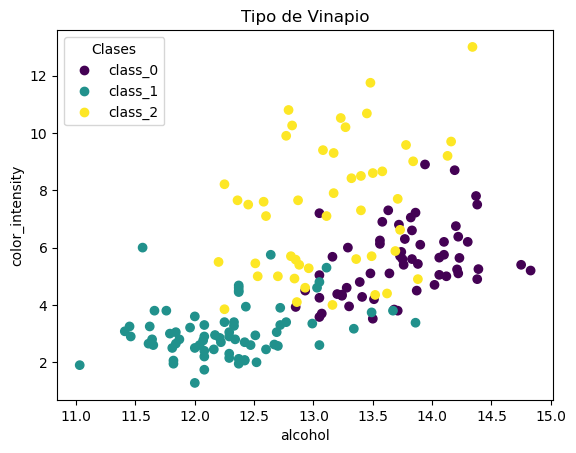

In [15]:
scatter = plt.scatter(
    wine.data[:, 0],   # Longitud del sépalo en el eje X (array de elementos de la columna 0)
    wine.data[:, 9],   # Ancho del sépalo en el eje Y
    c=wine.target)     # Color en función de las clases de las flores

plt.xlabel(wine.feature_names[0])   # Nombre del eje X
plt.ylabel(wine.feature_names[9])   # Nombre del eje Y
plt.legend(scatter.legend_elements()[0], wine.target_names, title="Clases")
plt.title("Tipo de Vinapio")
plt.show()

## Modelo de clasificación binaria

TODO: continuar este notebook completando:
- Crea un modelo para clasificar si una flor es de tipo virgínica (```iris.target == 2```) o no lo es (**clasificación binaria**) solo en función de la longitud del pétalo (columna 2 de ```iris.data```).
- Representa gráficamente el modelo y los datos de entrenamiento con ```matplotlib```.
- Calcula y representa cuál sería la predicción del modelo de que una flor con longitud de pétalo de 5 cm sea de tipo virgínica.

In [16]:
#Crea un modelo para clasificar si una flor es de tipo virgínica (iris.target == 2) o no lo es (clasficación binaria) solo en función de la longitud del pétalo (columna 2 de iris.data)
# Selecciono la columna 2 (longitud del pétalo) como característica 
X = wine.data[:, 0]

# Crear la variable objetivo (1 si es Virginica, 0 si no lo es)
y = (wine.target == 1).astype(int)

# Entrenamos el modelo de Regresión Logística
modelo = LogisticRegression()

modelo.fit(X.reshape(-1, 1), y)

LogisticRegression()

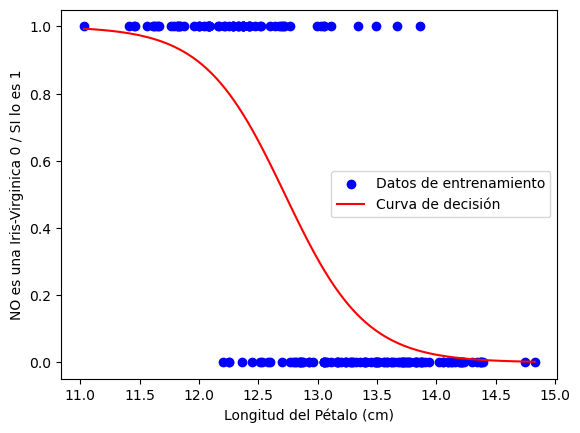

Probabilidad de ser Vinapio para una cantidad de alcohol de 12.75 grados: 48.08%


In [26]:
# Generamos una rejilla de puntos para la predicción
x_ejex = np.linspace(X.min(), X.max(), 100)

# Probabilidad de ser Virginica para cada punto
y_ejey = modelo.predict_proba(x_ejex.reshape(-1, 1))[:, 1]

# Dibujamos los datos de entrenamiento
plt.scatter(X, y, c="b", label="Datos de entrenamiento")

# Dibujamos la curva de decisión
plt.plot(x_ejex, y_ejey, c="r", label="Curva de decisión")

plt.xlabel("Longitud del Pétalo (cm)")

plt.ylabel("NO es una Iris-Virginica 0 / SI lo es 1")

plt.legend()

plt.show()

cantidad_alcohol = 12.75

probabilidad_clase0 = modelo.predict_proba(np.array([cantidad_alcohol]).reshape(-1, 1))[:, 1]

print(f"Probabilidad de ser Vinapio para una cantidad de alcohol de {cantidad_alcohol} grados: {probabilidad_clase0[0]:.2%}")